https://www.youtube.com/watch?v=GfIQlql-i2k&list=PLS1lqxOwNjObisoif-lZjwhpYfdd_MyjO&index=2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# Generate sample Data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0,8, n_samples)

In [2]:
s1 = np.sin(2*time)
s2 = np.sign(np.sin(3*time))
s3 = signal.sawtooth(2 * np.pi * time)


In [4]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)

In [5]:
S /= S.std(axis=0) # Standardize data
# Mix data
A = np.array([[1,1,1],[0.5,2,1.0],[1.5,1.0,2.0]])
X = np.dot(S, A.T) # generate observations

In [6]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

c:\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [7]:
# We can prove that the ICA model applies by reverting
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

In [8]:
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

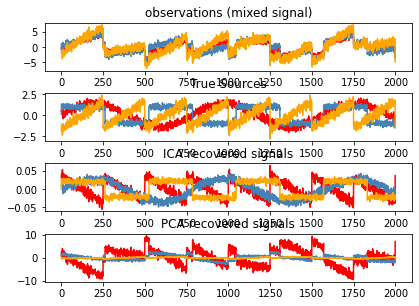

In [9]:
plt.figure()

models = [X, S, S_, H]
names = ['observations (mixed signal)', 
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color = color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()